In [6]:
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
from data_ingestion import fetch_stock_data

In [10]:
# Define the time period for analysis

short_window = 50 # 50 days window
long_window = 200 # 200 days window

# Define the tickers and date range
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']


stock_data = fetch_stock_data(tickers, start_date, end_date)
stock_data.head()

[*********************100%***********************]  4 of 4 completed


Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2024-08-12,HDFCBANK.NS,1642.035767,1660.099976,1675.949951,1647.349976,1652.000000,19658098.0
1,2024-08-12,INFY.NS,1752.507080,1797.400024,1803.500000,1768.099976,1773.050049,4315329.0
2,2024-08-12,RELIANCE.NS,1455.684448,1460.625000,1473.000000,1457.750000,1470.000000,8184584.0
3,2024-08-12,TCS.NS,4124.704590,4195.649902,4239.000000,4186.350098,4230.000000,936912.0
4,2024-08-13,HDFCBANK.NS,1585.755005,1603.199951,1632.400024,1601.150024,1628.000000,27027521.0


In [11]:
unique_tickers = stock_data['Ticker'].unique()
unique_tickers

array(['HDFCBANK.NS', 'INFY.NS', 'RELIANCE.NS', 'TCS.NS'], dtype=object)

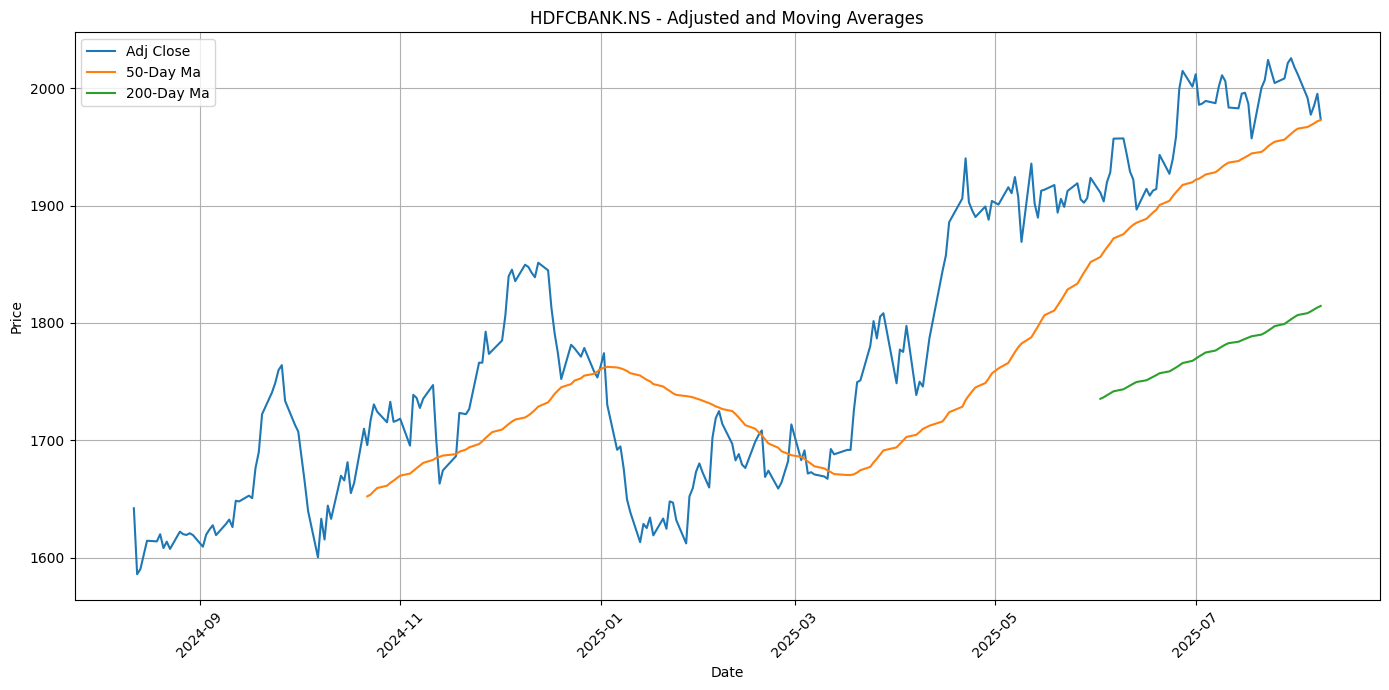

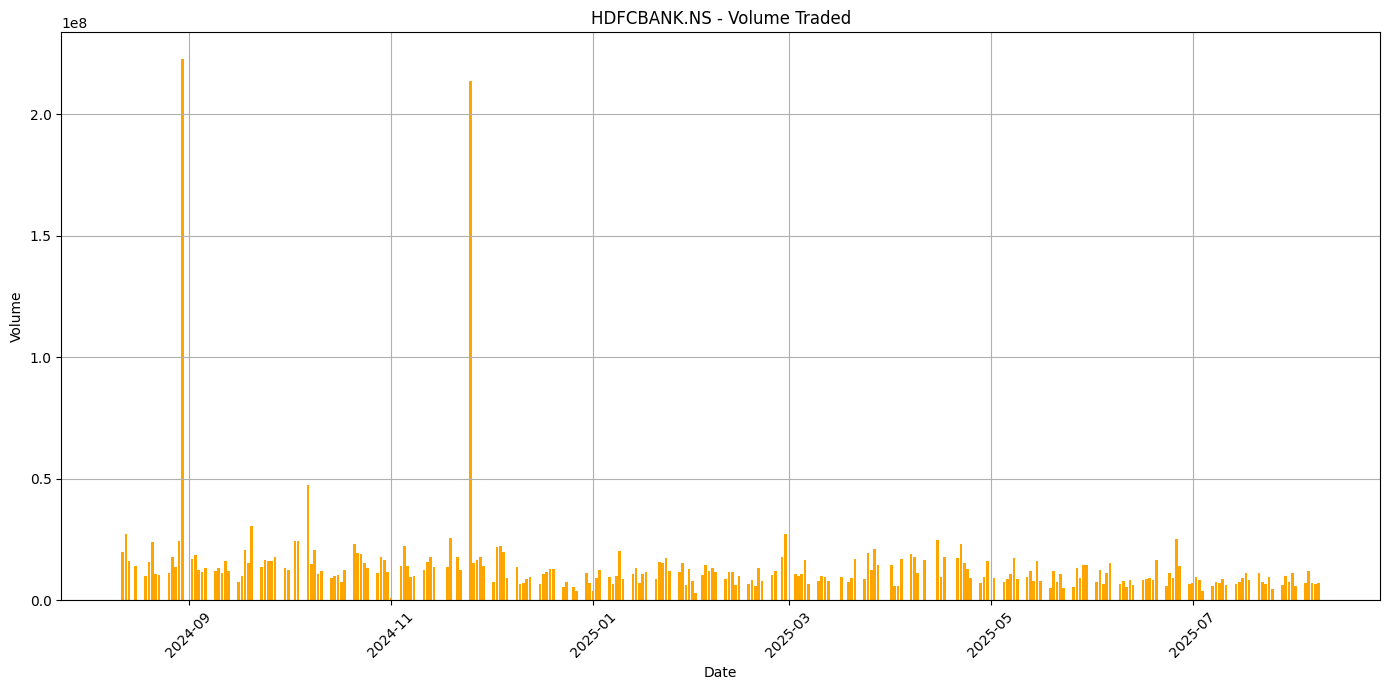

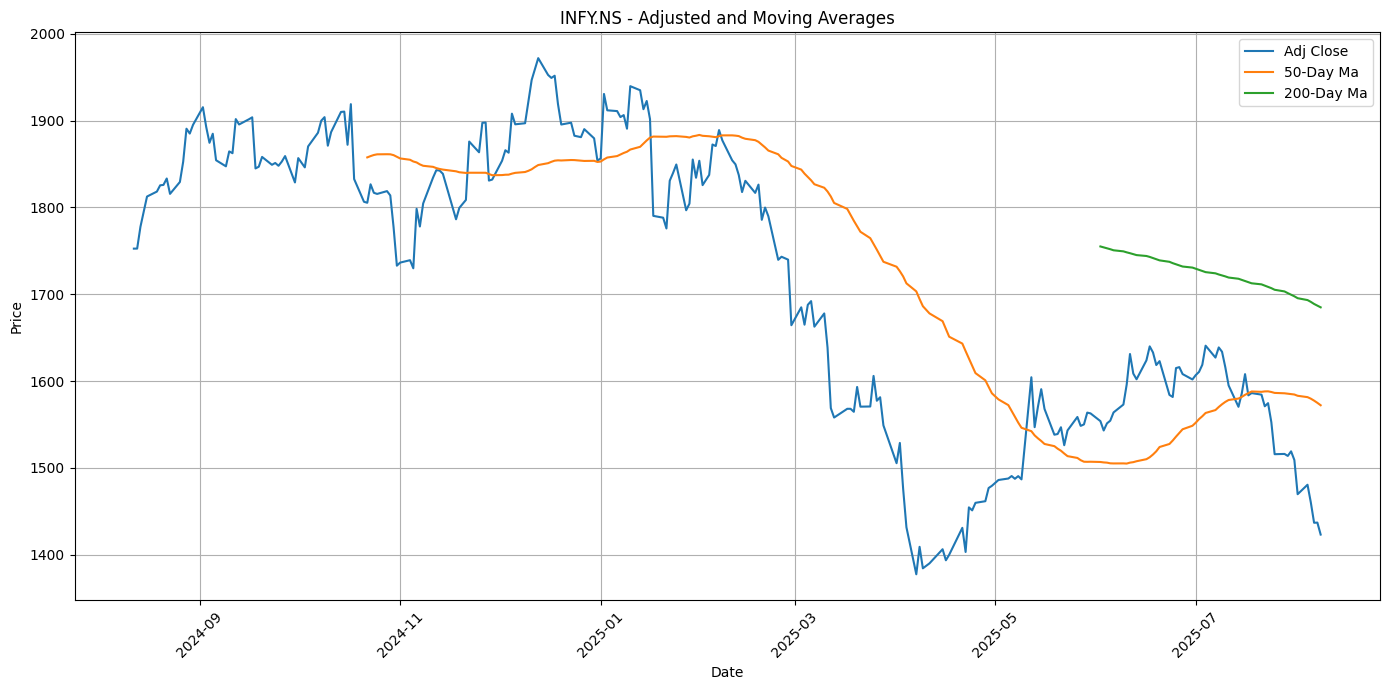

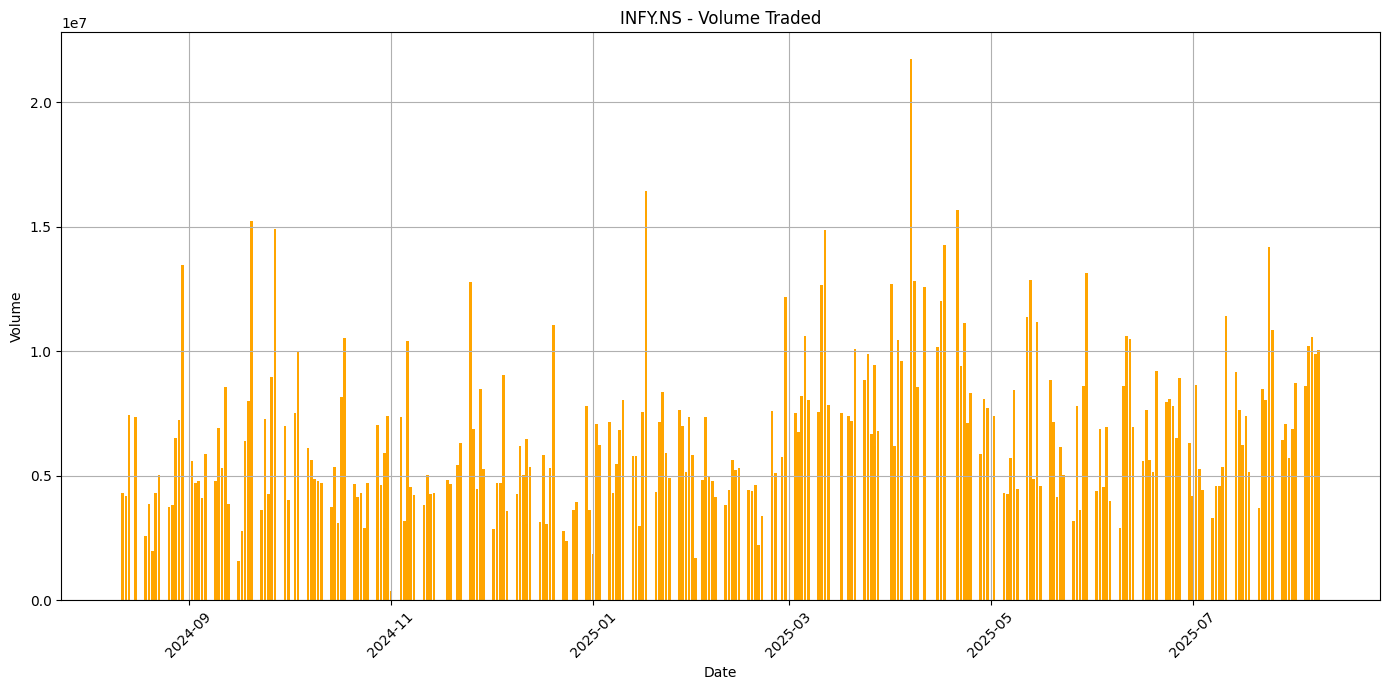

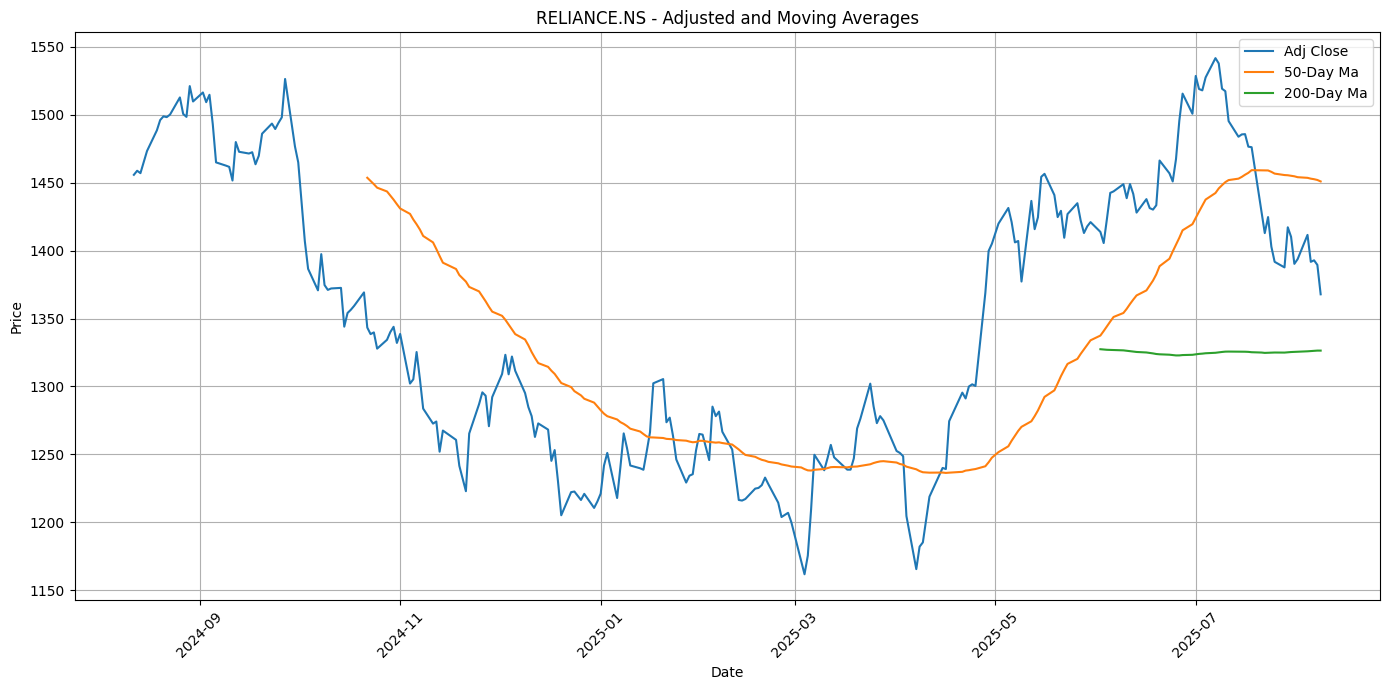

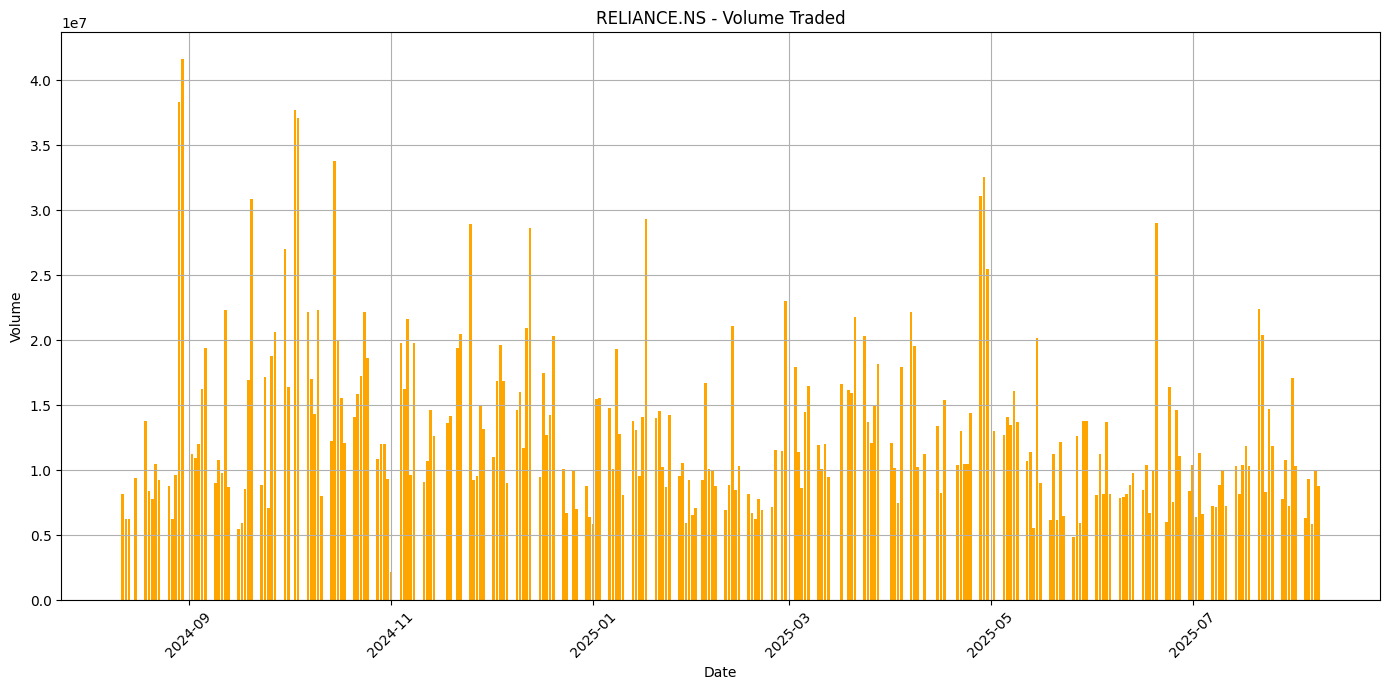

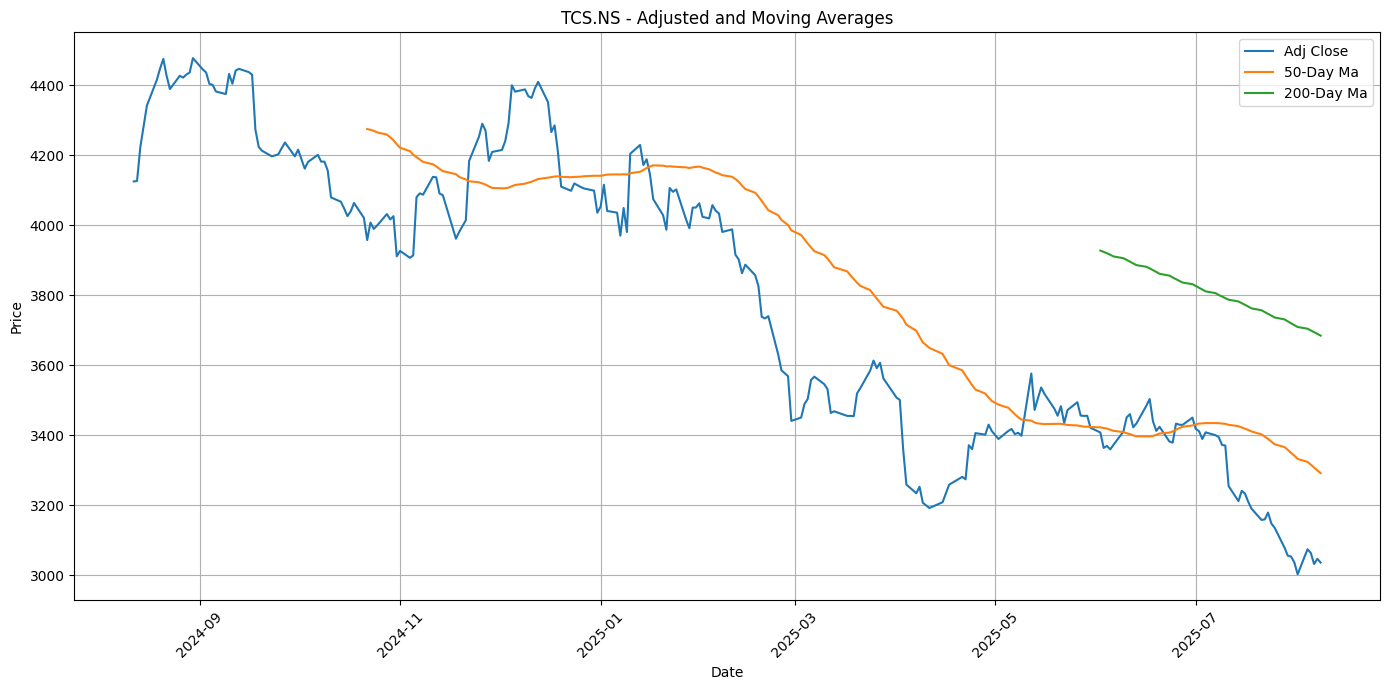

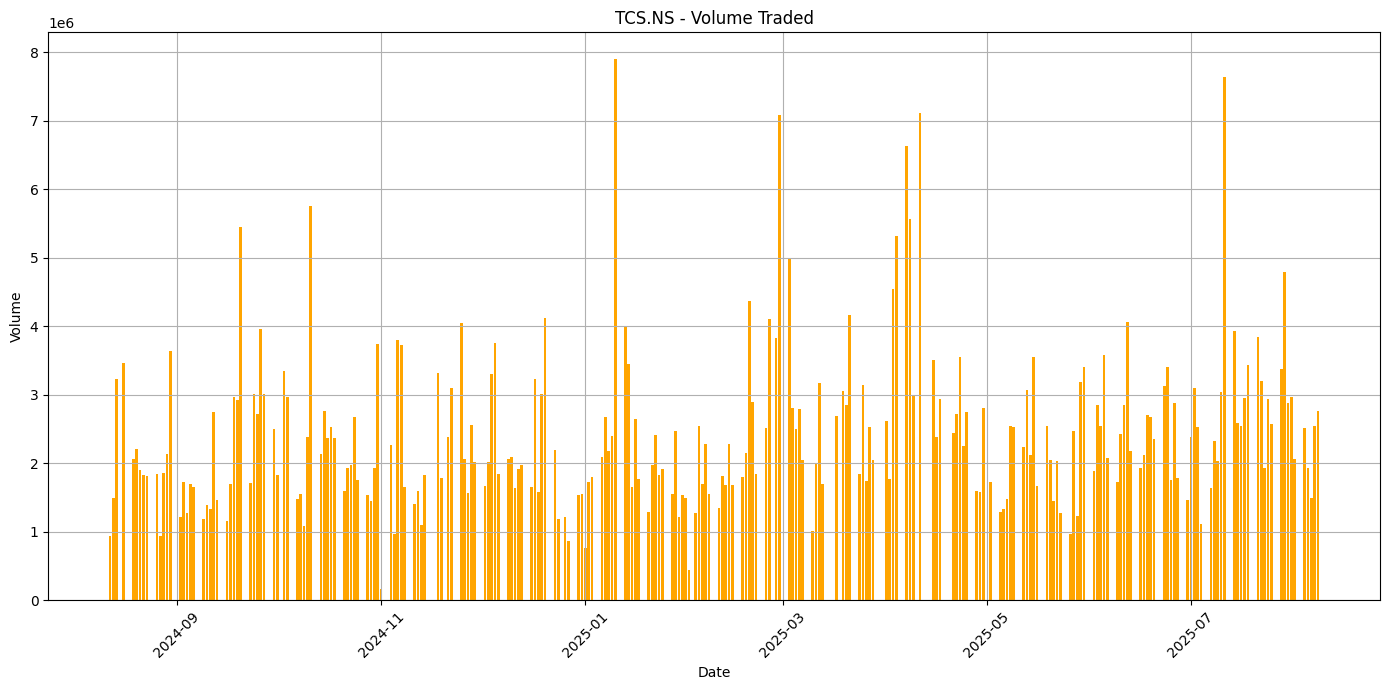

In [13]:
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA']= ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data['Date'], ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data['Date'], ticker_data['50_MA'], label='50-Day Ma')
    plt.plot(ticker_data['Date'], ticker_data['200_MA'], label='200-Day Ma')
    plt.title(f'{ticker} - Adjusted and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data['Date'], ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()